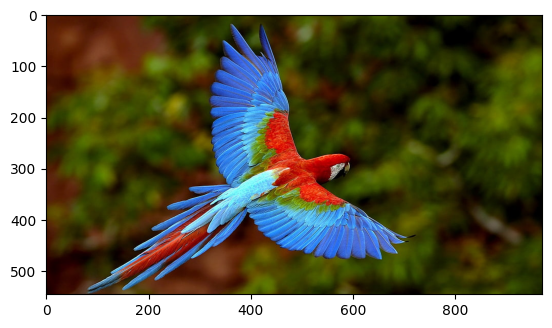

In [14]:
from PIL import Image , ImageDraw, ImageFont ,ImageOps
from bidi.algorithm import get_display
import arabic_reshaper
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Reading a color image using PIL 
img_pil = Image.open("input/macaw.jpg")

plt.imshow(img_pil)
plt.show()

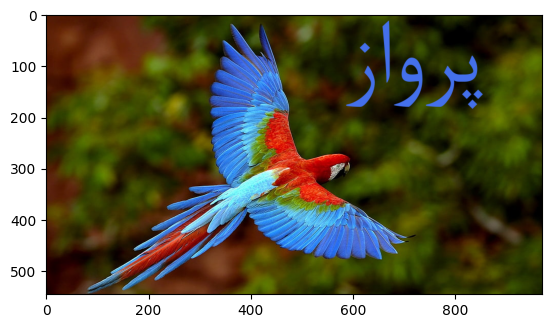

In [15]:
# Writing a Persian text on image
font = ImageFont.truetype("input/B-NAZANIN.TTF", 200)
text = "پرواز"
reshaped_text = arabic_reshaper.reshape(text)
bidi_text = get_display(reshaped_text)
draw = ImageDraw.Draw(img_pil)
draw.text((580, 0), bidi_text, (68,112,235), font=font)

img_pil.save("output/result.jpg")
plt.imshow(img_pil)
plt.show()

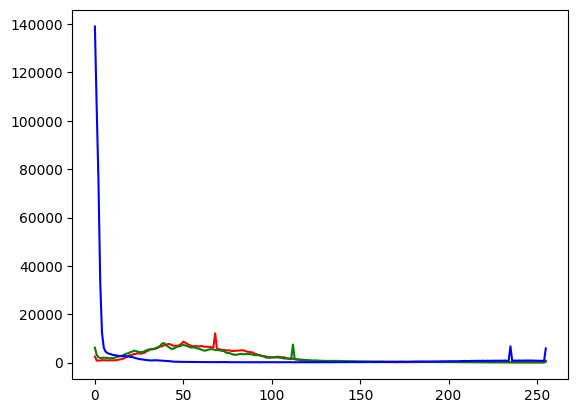

In [16]:
# Calculating RGB histograms and showing them using plt

img_cv2 = np.array(img_pil)  # PIL to cv2 conversion

colors = ['red', 'green', 'blue']

for i, color in enumerate(colors):
    img_cv2_hist = cv2.calcHist([img_cv2], [i], None, [256], [0, 256])
    plt.plot(img_cv2_hist, color= color)

plt.show()

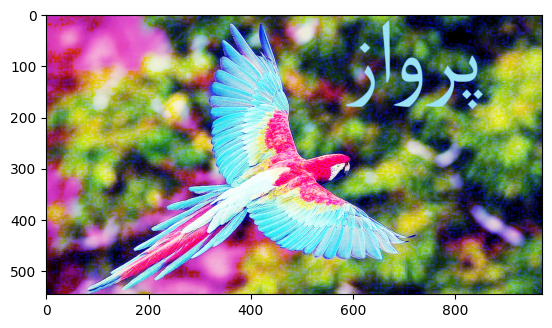

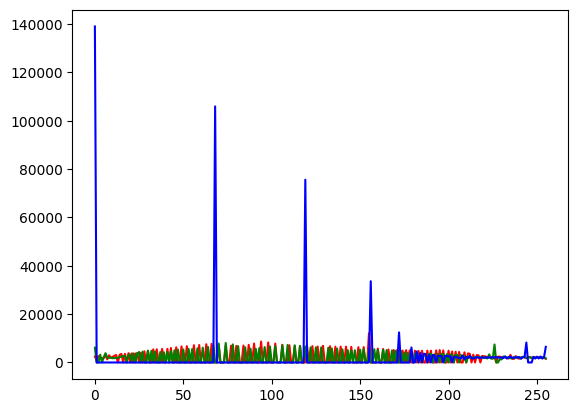

In [17]:
# histogram equalization
img_pil_high_cont = ImageOps.equalize(img_pil)
img_pil_high_cont.save("output/high contrast macaw.jpg")

plt.imshow(img_pil_high_cont)
plt.show()

img_cv2_high_cont = np.array(img_pil_high_cont)
for i, color in enumerate(colors):
    hist_img_cv2_high_cont = cv2.calcHist([img_cv2_high_cont], [i], None, [256], [0, 256])
    plt.plot(hist_img_cv2_high_cont, color= color)



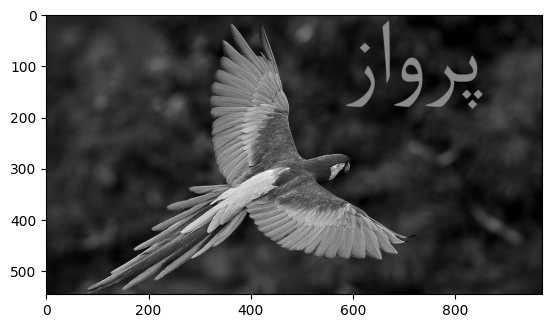

In [18]:
# colored to gray conversion
img_cv2_gray = np.mean(img_cv2, axis=2)

cv2.imwrite("output/result_gray.jpg", img_cv2_gray)
plt.imshow(img_cv2_gray, cmap='gray')
plt.show()

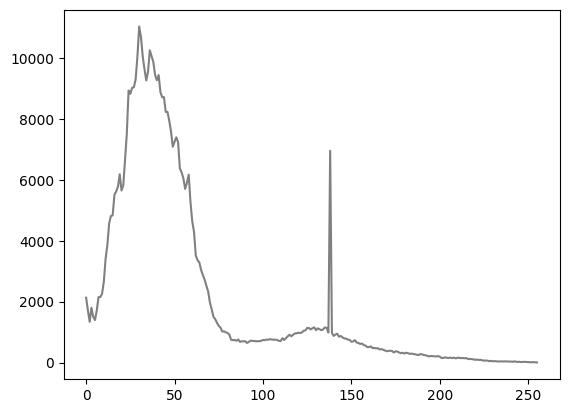

In [19]:
# gray image histogram
img_pil_gray = Image.fromarray(img_cv2_gray)
hist_img_pil_gray = img_pil_gray.histogram()

plt.plot(hist_img_pil_gray, color='gray')
plt.show()

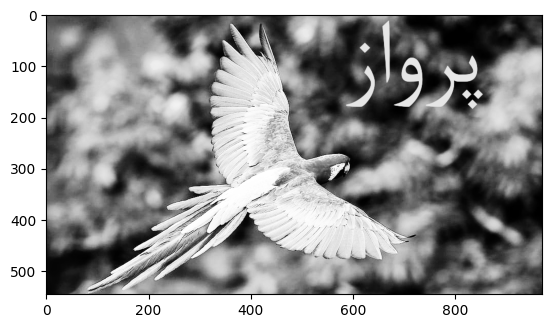

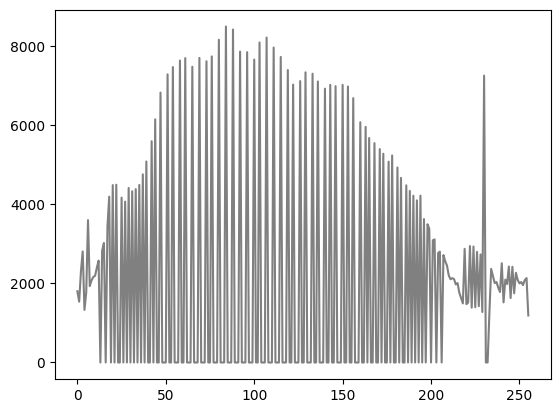

In [20]:
# gray image histogram equalization
img_pil_gray =img_pil.convert("L")
img_pil_gray_high_cont = ImageOps.equalize(img_pil_gray) 
img_pil_gray_high_cont.save("output/result_gray_high_cont.jpg")
plt.imshow(img_pil_gray_high_cont, cmap="gray" )
plt.show()

hist_img_pil_gray_high_cont = img_pil_gray_high_cont.histogram()

plt.plot(hist_img_pil_gray_high_cont, color='gray')
plt.show()